# Customer Purchase Behavior Analysis

Hang Ngo
<br>
Professor Stefani Langehennig
<br>
INFO 4120-2: Midterm Project Part 1
<br>
18 Oct 2023

### Executive Summary

The two sets of data contain the information of customers who registered their account from 2012 to 2014. The registration data is only considered complete when there's no 0 in income.
<br>
The first dataset, background, includes the date of birth, marital status, children count, and income of the customers.
<br>
The second dataset, history, includes the date they became customers, how much they spent on each product category (wine, fruits, meat, fish, sweets, and gold) in the last 2 years, whether they used deals or not, different channels of purchases, and behaviour toward promotions. It also includes number of days since they last purchased and whether or not there were complaints from the customers for the last 2 years.
<br>
The data set will serve the company significantly in understanding their customers' background and purchase behavior. Therefore, the company can create different marketing campaigns targeted at different segments of their clientele.
<br>
In this analysis, we are interested the overall background of the customers, including their marital status, children, educational background, and income. We want to know who the majority of our clientele is.
We are also looking into those who purchase our products via website and how the website sales perform compared to other channels.

### Research Questions
- How many customers signed up completely with us from the year of 2012 to 2014 (complete signup means they don't leave the income blank or enter outlier value (example: $600000+)?
- How many people purchase through the website?
- How many sales are made through the web? How many percentages of sales are made through the web in the last 2 years?
- For the people who website purchase frequency is high (18 - 27 times in the last 2 years), what can you tell about their background (education, marital and children status, and income)?

Datasource: Customer Personality Analysis
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

### Getting to know the data

In [1]:
import pandas as pd
import numpy as np
from numpy import nan as NA
from pandas import Series, DataFrame
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the first dataset
background = pd.read_csv("background.csv")
background.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome
0,5524,1957,Graduation,Single,58138.0,0,0
1,2174,1954,Graduation,Single,46344.0,1,1
2,4141,1965,Graduation,Together,71613.0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0
4,5324,1981,PhD,Married,58293.0,1,0


In [3]:
# Read the second dataset
history = pd.read_csv("history.csv")
history.head(5)

,ID,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,9/4/12,58,635,88,546,172,88,88,3,...,7,0,0,0,0,0,0,3,11,1
1,2174,3/8/14,38,11,1,6,2,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,8/21/13,26,426,49,127,111,21,42,1,...,4,0,0,0,0,0,0,3,11,0
3,6182,2/10/14,26,11,4,20,10,3,5,2,...,6,0,0,0,0,0,0,3,11,0
4,5324,1/19/14,94,173,43,118,46,27,15,5,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Merge the 2 datasets
customer = pd.merge(background, history, on="ID", how="outer")
customer.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Check the data types of variables
customer.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
# Check column names
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Rearragning and cleaning the data

Includes recoding at least 1 variable and creating bins for at least 1 variable

In [8]:
# Calculate total spending for each customer
customer["Total_Spend_2_Years"] = customer["MntWines"] + customer["MntFruits"] + customer["MntMeatProducts"] + customer["MntFishProducts"]\
+ customer["MntSweetProducts"] + customer["MntGoldProds"]

# Calculate number of children and create categorical variable for children
customer["Children"] = customer["Kidhome"] + customer["Teenhome"]
customer["Child_Status"] = np.where(customer.Children == 0, "No Child", "1 or More")

# Recategorize education and marital status
customer["Marital_Status"] = customer["Marital_Status"].replace({"Divorced":"No Partner", "Single":"No Partner", "Alone":"No Partner",\
                                                                 "Married":"With Partner", "Together":"With Partner",\
                                                                 "Absurd":"No Partner", "Widow":"No Partner", "YOLO":"No Partner"})
customer["Education"] = customer["Education"].replace({"Basic":"Bachelor", "Graduation":"Bachelor",\
                                                       "2n Cycle":"Master", "Master":"Master", "PhD":"PhD"})


In [9]:
# Only keep the following columns for the purpose of our analysis
customer = customer[["Education", "Marital_Status", "Income", "Child_Status",\
                    "Total_Spend_2_Years", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]]
customer.head(10)

,Education,Marital_Status,Income,Child_Status,Total_Spend_2_Years,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,Bachelor,No Partner,58138.0,No Child,1617,8,10,4
1,Bachelor,No Partner,46344.0,1 or More,27,1,1,2
2,Bachelor,With Partner,71613.0,No Child,776,8,2,10
3,Bachelor,With Partner,26646.0,1 or More,53,2,0,4
4,PhD,With Partner,58293.0,1 or More,422,5,3,6
5,Master,With Partner,62513.0,1 or More,716,6,4,10
6,Bachelor,No Partner,55635.0,1 or More,590,7,3,7
7,PhD,With Partner,33454.0,1 or More,169,4,0,4
8,PhD,With Partner,30351.0,1 or More,46,3,0,2
9,PhD,With Partner,5648.0,1 or More,49,1,0,0


In [10]:
# Remove outliers and missing values in incomes
customer = customer.dropna(subset = ["Income"])
customer = customer[customer["Income"] < 600000]
customer.head(10)

,Education,Marital_Status,Income,Child_Status,Total_Spend_2_Years,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,Bachelor,No Partner,58138.0,No Child,1617,8,10,4
1,Bachelor,No Partner,46344.0,1 or More,27,1,1,2
2,Bachelor,With Partner,71613.0,No Child,776,8,2,10
3,Bachelor,With Partner,26646.0,1 or More,53,2,0,4
4,PhD,With Partner,58293.0,1 or More,422,5,3,6
5,Master,With Partner,62513.0,1 or More,716,6,4,10
6,Bachelor,No Partner,55635.0,1 or More,590,7,3,7
7,PhD,With Partner,33454.0,1 or More,169,4,0,4
8,PhD,With Partner,30351.0,1 or More,46,3,0,2
9,PhD,With Partner,5648.0,1 or More,49,1,0,0


In [11]:
# Create income segment, here we separate the income column into 4 groups
income_labels = ["Low", "Middle", "Upper Middle", "High"]
income_bins = [0, 30000, 65000, 100000, 170000]
customer["Income_Group"] = pd.cut(customer["Income"], bins = income_bins, labels = income_labels)

In [12]:
# Create web purchases segment, here we separate the number of web purchases into 3 groups
web_labels = ["Low", "Normal", "High"]
web_bins = [0, 3, 6, 27]
customer["Web_Frequency"] = pd.cut(customer["NumWebPurchases"], bins = web_bins, labels = web_labels)
customer.head(10)

,Education,Marital_Status,Income,Child_Status,Total_Spend_2_Years,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Income_Group,Web_Frequency
0,Bachelor,No Partner,58138.0,No Child,1617,8,10,4,Middle,High
1,Bachelor,No Partner,46344.0,1 or More,27,1,1,2,Middle,Low
2,Bachelor,With Partner,71613.0,No Child,776,8,2,10,Upper Middle,High
3,Bachelor,With Partner,26646.0,1 or More,53,2,0,4,Low,Low
4,PhD,With Partner,58293.0,1 or More,422,5,3,6,Middle,Normal
5,Master,With Partner,62513.0,1 or More,716,6,4,10,Middle,Normal
6,Bachelor,No Partner,55635.0,1 or More,590,7,3,7,Middle,High
7,PhD,With Partner,33454.0,1 or More,169,4,0,4,Middle,Normal
8,PhD,With Partner,30351.0,1 or More,46,3,0,2,Middle,Low
9,PhD,With Partner,5648.0,1 or More,49,1,0,0,Low,Low


#### Data dictionary

|Column |Data Type|Description  |Data Example | 
|-----|:-----|:---:|:-----:|
|Education|Str|Identify the educational level of the customers to determine customer demography   |Bachelor |
|Marital_Status|Str|Identify the marital status of the customers to determine customer demography   |With Partner |
|Income|Float|Identify the income level of customers to understand to determine customer demography   |40000 |
|Child_Status|Str|Identify whether the customer has at least 1 child to determine customer demography   |No Child |
|Education|Str|Identify the educational level of the customers to determine customer demography   |Bachelor |
|Total_Spend_2_Years|Int|How much the customers spend in the last 2 years   |500 |
|NumWebPurchase|Int|How many times the customers make purchases through the web in the last 2 years   |1 |
|NumCatalogPurchase|Int|How many times the customers make purchases through the catalog in the last 2 years   |1 |
|NumStorePurchase|Int|How many times the customers make purchases through the store in the last 2 years   |1 |
|Income_Group|Int|Identify the income level of customers, from low, middle, upper middle, to high   |Low |
|Web_Frequency|Int|Identify the frequency of web purchases by the customers in the last 2 years, from low, to normal, to high. This will help us with the web purchase analysis   |Normal |

### Data Exploration

In [13]:
# Summarize and compute descriptive statistics for continuous variables
customer[["Income", "Total_Spend_2_Years", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].describe()

,Income,Total_Spend_2_Years,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,51969.861400,607.321445,4.085779,2.671783,5.802257
std,21526.320095,602.925291,2.741473,2.927179,3.250974
min,1730.000000,5.000000,0.000000,0.000000,0.000000
25%,35284.000000,69.000000,2.000000,0.000000,3.000000
50%,51373.000000,397.000000,4.000000,2.000000,5.000000
75%,68487.000000,1048.000000,6.000000,4.000000,8.000000
max,162397.000000,2525.000000,27.000000,28.000000,13.000000


Text(0.5, 1.0, 'Store Purchases')

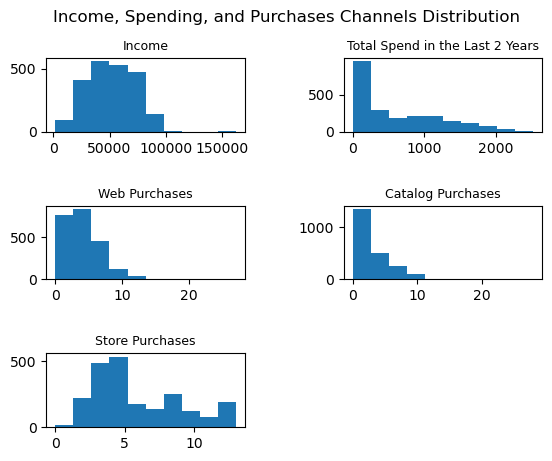

In [14]:
# Histogram distributions for Income, Total Spending, Web Purchases, Catalog Purchases, Store Purchases
plt.suptitle("Income, Spending, and Purchases Channels Distribution", fontsize = '12')
plt.subplots_adjust(hspace = 1, wspace = 0.5)

plt.subplot(3, 2, 1)
plt.hist(customer.Income)
plt.title("Income", fontsize = "9")

plt.subplot(3, 2, 2)
plt.hist(customer.Total_Spend_2_Years)
plt.title("Total Spend in the Last 2 Years", fontsize = "9")

plt.subplot(3, 2, 3)
plt.hist(customer.NumWebPurchases)
plt.title("Web Purchases", fontsize = "9")

plt.subplot(3, 2, 4)
plt.hist(customer.NumCatalogPurchases)
plt.title("Catalog Purchases", fontsize = "9")

plt.subplot(3, 2, 5)
plt.hist(customer.NumStorePurchases)
plt.title("Store Purchases", fontsize = "9")

In [15]:
# Summarize educational background of customers
edu_count = DataFrame(customer.Education.value_counts())

# Summarize marital status of customers and their children
marriage_count = DataFrame(customer.Marital_Status.value_counts())
has_child_count = DataFrame(customer.Child_Status.value_counts())

# Summarize income group
income_group_count = DataFrame(customer.Income_Group.value_counts())

# Summarize web purchase frequency
web_freq = DataFrame(customer.Web_Frequency.value_counts())

print(edu_count)
print(marriage_count)
print(has_child_count)
print(income_group_count)
print(web_freq)

          Education
Bachelor       1169
Master          565
PhD             481
              Marital_Status
With Partner            1429
No Partner               786
           Child_Status
1 or More          1582
No Child            633
              Income_Group
Middle                1170
Upper Middle           663
Low                    370
High                    12
        Web_Frequency
Low              1049
Normal            697
High              421


Text(0.5, 1.0, 'Web Purchase Frequency')

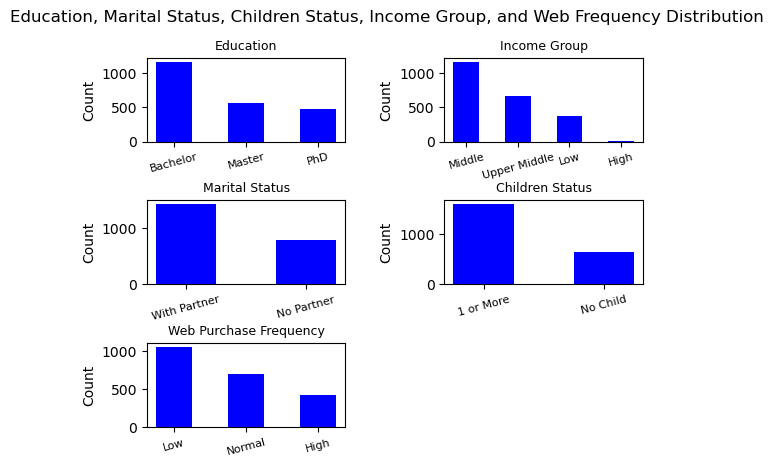

In [16]:
# Create distribution charts for Education, Marital Status, Children Status, Income Group, and Web Frequency
plt.suptitle("Education, Marital Status, Children Status, Income Group, and Web Frequency Distribution", fontsize = '12')
plt.subplots_adjust(hspace = 0.7, wspace = 0.5)

plt.subplot(3, 2, 1)
y = edu_count.Education
n = len(y)
x = np.arange(n)
plt.bar(x, y, width = 0.5, color = "blue")
plt.ylabel("Count")
plt.xticks(x, edu_count.index, rotation = 15, fontsize = "8")
plt.title("Education", fontsize = "9")

plt.subplot(3, 2, 2)
y = income_group_count.Income_Group
n = len(y)
x = np.arange(n)
plt.bar(x, y, width = 0.5, color = "blue")
plt.ylabel("Count")
plt.xticks(x, income_group_count.index, rotation = 15, fontsize = "8")
plt.title("Income Group", fontsize = "9")

plt.subplot(3, 2, 3)
y = marriage_count.Marital_Status
n = len(y)
x = np.arange(n)
plt.bar(x, y, width = 0.5, color = "blue")
plt.ylabel("Count")
plt.xticks(x, marriage_count.index, rotation = 15, fontsize = "8")
plt.title("Marital Status", fontsize = "9")

plt.subplot(3, 2, 4)
y = has_child_count.Child_Status
n = len(y)
x = np.arange(n)
plt.bar(x, y, width = 0.5, color = "blue")
plt.ylabel("Count")
plt.xticks(x, has_child_count.index, rotation = 15, fontsize = "8")
plt.title("Children Status", fontsize = "9")

plt.subplot(3, 2, 5)
y = web_freq.Web_Frequency
n = len(y)
x = np.arange(n)
plt.bar(x, y, width = 0.5, color = "blue")
plt.ylabel("Count")
plt.xticks(x, web_freq.index, rotation = 15, fontsize = "8")
plt.title("Web Purchase Frequency", fontsize = "9")

In [17]:
# Compare multiple variable
# Find the correlation between income and total spending in the last 2 years
correlation = customer.Income.corr(customer.Total_Spend_2_Years)
correlation

0.7926502833622051

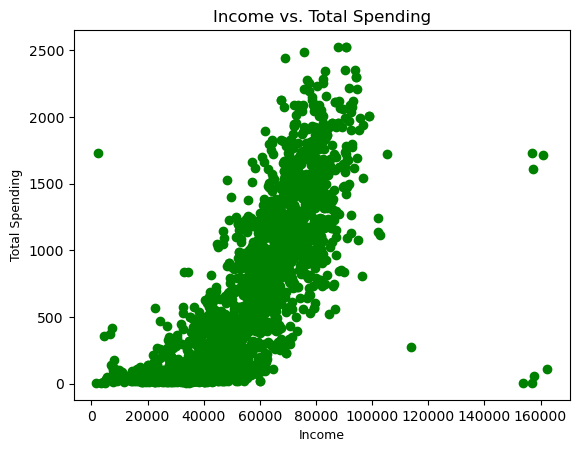

In [18]:
# Draw scatterplot to see the relationship between income and total spending in the last 2 years
plt.scatter(customer.Income, customer.Total_Spend_2_Years, color = "green")
plt.title("Income vs. Total Spending", fontsize = "12")
plt.xlabel("Income", fontsize = "9")
plt.ylabel("Total Spending", fontsize = "9")
plt.show()

In [19]:
# Explore the distribution of family type: marital status, children status
family_type = pd.crosstab(customer.Marital_Status, customer.Child_Status)
family_type

Child_Status,1 or More,No Child
Marital_Status,,
No Partner,534,252
With Partner,1048,381


### Addressing the research questions

In [20]:
# How many customers signed up with us and completed the sign-up process in the last 2 years?
customer.Income.count()

2215

In [21]:
# How many customers purchased through the web in the last 2 years?
web_purchases_count = customer.loc[customer.NumWebPurchases > 0]
len(web_purchases_count)

2167

In [22]:
# How many percent of sales were purchased through the web in the last 2 years?
sum_web = customer["NumWebPurchases"].sum()
all_purchases = customer["NumWebPurchases"].sum() + customer["NumCatalogPurchases"].sum() + customer["NumStorePurchases"].sum()
percent = round((sum_web/all_purchases * 100), 2)
print(f"Total web purchases: {sum_web} and Web percent: {percent}%")

Total web purchases: 9050 and Web percent: 32.53%


In [23]:
# Drill down the customer demographics for those with high web purchases frequency (6-27) in the last 2 years?
web_df = customer.loc[customer.Web_Frequency == "High"]
web_df = web_df[["Education", "Marital_Status", "Income", "Child_Status"]]
web_df

,Education,Marital_Status,Income,Child_Status
0,Bachelor,No Partner,58138.0,No Child
2,Bachelor,With Partner,71613.0,No Child
6,Bachelor,No Partner,55635.0,1 or More
15,PhD,No Partner,82800.0,No Child
18,Master,With Partner,76995.0,1 or More
...,...,...,...,...
2225,Bachelor,With Partner,58554.0,1 or More
2226,Bachelor,With Partner,63777.0,1 or More
2231,Master,No Partner,44802.0,No Child
2235,Bachelor,With Partner,61223.0,1 or More


In [24]:
# Get descriptive statistics for income
web_df["Income"].describe()

count       421.000000
mean      63476.748219
std       13910.402219
min        4428.000000
25%       55424.000000
50%       63693.000000
75%       71796.000000
max      113734.000000
Name: Income, dtype: float64

Text(0.5, 1.0, 'Income distribution')

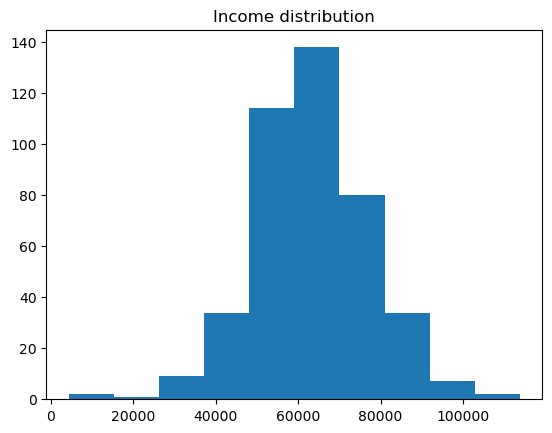

In [25]:
# Create income histogram for web_df
plt.hist(web_df.Income)
plt.title("Income distribution", fontsize = "12")

In [26]:
# Breakdown Education, Marital Status, and Children Status
print(DataFrame(web_df.Education.value_counts()))
print(DataFrame(web_df.Marital_Status.value_counts()))
print(DataFrame(web_df.Child_Status.value_counts()))

          Education
Bachelor        212
PhD             108
Master          101
              Marital_Status
With Partner             279
No Partner               142
           Child_Status
1 or More           310
No Child            111


### Conclusion

#### Data discussion
What do we learn from our data?
- We have 2215 customers who completed the sign-up process from the year of 2012 to 2014
- The average income of those customers is 51,969 and the income range is 1,730 to 162,397
- 52.82% of the customers (1170 out of 2215) is in the "middle income" segment, for which this analysis assign a range of 30000 to 65000
- On average, the customers spent 607,32 in the last two years. The minimum spend is 5 and the maximum is 2,525
- 52.77% of the customers (1169 out of 2215) hold a bachelor's degree, which makes it the most common degree
- 64.33% of the customers (1429 out of 2215) live with a partner, and 71% of the customers (1582 out of 2215) have at least 1 child 
- There is a strong, positive correlation between the income of the customers and the amount they spend in the last 2 years

#### Answering research questions
Addressing each research questions:
- 2215 customers signed up and completed the sign-up process from 2012 to 2014
- 2167 customers purchased through the web in the last 2 years
- 9050 sales were made through the web, and they make up 32.53 of total sales
- 421 customers have high web purchases frequency in the past 2 years. 212 them hold a Bachelor's degree; 279 live with a partner; and 310 have at least 1 child.

### Saving data set for final analysis 

In [1]:
customer.to_csv("customer_final.csv", index = False)

NameError: name 'customer' is not defined